In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PhysPropWater import rho
from sklearn.preprocessing import MinMaxScaler

In [10]:
torch.manual_seed(42)
np.random.seed(42)

scaler = MinMaxScaler()

#x = torch.tensor(rho[:,0], dtype=torch.float32).reshape(-1, 1)
#print(x)
X_scaled = scaler.fit_transform(rho[:,0].reshape(-1, 1))
y_scaled = scaler.fit_transform(rho[:,1].reshape(-1, 1))
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_scaled_tensor = torch.tensor(y_scaled, dtype=torch.float32)

In [11]:
class ModelA(nn.Module):
    def __init__(self):
        super(ModelA, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 1)    
        )
        
    def forward(self, x):
        return self.model(x)

class ModelB(nn.Module):
    def __init__(self):
        super(ModelB, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.model(x)

In [12]:
# Data
X = torch.tensor(X_scaled_tensor, dtype=torch.float32)
y = torch.tensor(y_scaled_tensor, dtype=torch.float32)

#print(f"X.shape = {X.shape}")
#print(f"X: {X}")
#print(f"y: {y}")

C:\Users\olofs\AppData\Local\Temp\ipykernel_11312\468604007.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X_scaled_tensor, dtype=torch.float32)
C:\Users\olofs\AppData\Local\Temp\ipykernel_11312\468604007.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y_scaled_tensor, dtype=torch.float32)


In [13]:
#model = ModelA() 
model = ModelB()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [14]:
# Train the model

EPOCS = 5000
losses = []  # List to store loss values for each epoch
every_500_losses = []

print("Starting training...")

for epoch in range(EPOCS):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    # Print the loss every 500 epochs to monitor training
    if epoch % 500 == 0:
        print(f"Epoch {epoch}/{EPOCS} - Loss: {loss.item()}")

    

print("Training completed.")

Starting training...
Epoch 0/5000 - Loss: 0.6507376432418823
Epoch 500/5000 - Loss: 0.00014085556904319674
Epoch 1000/5000 - Loss: 3.353875581524335e-05
Epoch 1500/5000 - Loss: 2.9376438760664314e-05
Epoch 2000/5000 - Loss: 2.6977293600793928e-05
Epoch 2500/5000 - Loss: 2.552804653532803e-05
Epoch 3000/5000 - Loss: 2.4152477635652758e-05
Epoch 3500/5000 - Loss: 2.294593105034437e-05
Epoch 4000/5000 - Loss: 2.201324241468683e-05
Epoch 4500/5000 - Loss: 2.138171112164855e-05
Training completed.


In [15]:
# Predictions
xpred = torch.linspace(0, 1, 120).view(-1, 1)
ypred = model(xpred).detach().numpy()
print("Predictions completed for xpred values.")

Predictions completed for xpred values.


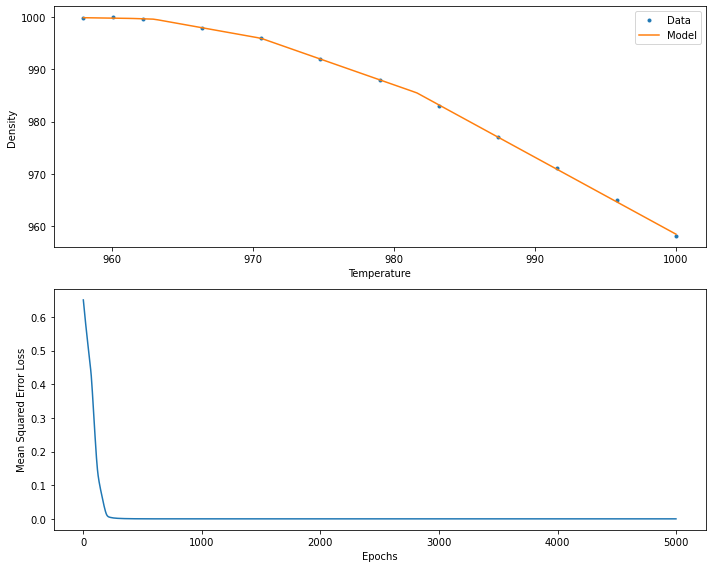

Parameter containing:
tensor([[ 0.8284],
        [ 0.9607],
        [-0.1479],
        [ 0.8849],
        [-0.3801],
        [ 0.4914],
        [-0.5471],
        [ 0.8886],
        [ 1.1480],
        [-0.3453]], requires_grad=True)
Parameter containing:
tensor([ 1.0507, -0.0786,  0.9442,  0.0665,  0.5346, -0.1474,  0.9562,  0.2460,
        -0.3444,  0.4902], requires_grad=True)
Parameter containing:
tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
          0.0298, -0.3123],
        [ 0.4581, -0.1378,  0.4191,  0.2147,  0.0588,  0.0897,  0.2213,  0.4444,
          0.0377,  0.0938],
        [ 0.1116, -0.1948,  0.2430,  0.1831,  0.3263, -0.4868,  0.3257, -0.0102,
         -0.1239,  0.0152],
        [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
          0.2475, -0.2247],
        [ 0.1978, -0.2273,  0.3072, -0.0719,  0.3163, -0.2413,  0.4791, -0.0771,
         -0.3707,  0.0388],
        [ 0.4585,  0.2559,  0.4728, -0.0778, -0.166

In [21]:
# Create a figure and a 2x1 grid of axes
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plotting data and model predictions on the first subplot

axes[0].plot(scaler.inverse_transform(X_scaled_tensor.numpy()), scaler.inverse_transform(y_scaled_tensor.numpy()), '.', label='Data')
axes[0].plot(scaler.inverse_transform(xpred.numpy()), scaler.inverse_transform(ypred), label='Model')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plotting loss values on the second subplot
axes[1].plot(losses)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Squared Error Loss')

# Adjust layout to avoid overlaps
plt.tight_layout()
plt.show()

# Print model weights
for param in model.parameters():
    print(param)
    #print(param.data)
